<a href="https://colab.research.google.com/github/syedshubha/PulseSCQ/blob/main/W_StateCKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing required packages
%%capture
!pip install --quiet qiskit qiskit-aer pylatexenc qiskit-ibm-runtime qiskit-dynamics &> /dev/null

#$|W\rangle = \frac{1}{\sqrt{3}}(\left|001\rangle+|010\rangle+|100\rangle\right)$
We want to create the state using gate level coding first.

In [2]:
from qiskit_aer import *
from qiskit import *
from numpy import *
import warnings
import getpass

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import array_to_latex as show

In [3]:
simulator = AerSimulator(method='statevector')

qc = QuantumCircuit(3,1)
theta = 2 * acos(1 / sqrt(3))

qc.ry(theta,0)
qc.cry(pi/2,0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)

qc.save_statevector()
show(simulator.run(qc).result().get_statevector())

<IPython.core.display.Latex object>

In [4]:
q = QuantumCircuit(3,1)
theta = 2 * acos(1 / sqrt(3))

q.ry(theta,0)
q.ry(pi/4,1)
q.cx(0,1)
q.ry(-pi/4,1)
q.cx(1,2)
q.cx(0,1)
q.x(0)

q.save_statevector()
show(simulator.run(q).result().get_statevector())

<IPython.core.display.Latex object>

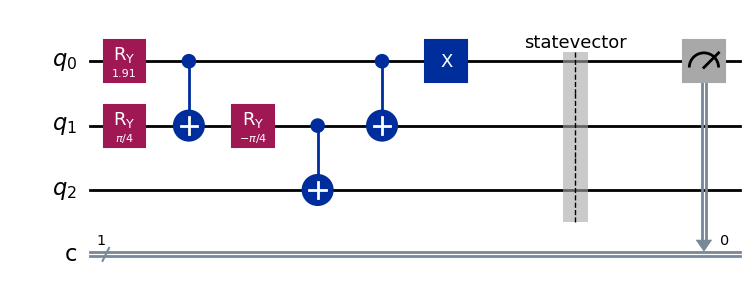

In [5]:
q.measure(0,0)
q.draw("mpl")

In [6]:
q.draw("latex_source")

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{R_Y}\\,(\\mathrm{1.911})} & \\ctrl{1} & \\qw & \\qw & \\ctrl{1} & \\gate{\\mathrm{X}} \\barrier[0em]{2} & \\cds{0}{^{\\mathrm{statevector}}} & \\meter & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\gate{\\mathrm{R_Y}\\,(\\mathrm{\\frac{\\pi}{4}})} & \\targ & \\gate{\\mathrm{R_Y}\\,(\\mathrm{\\frac{-\\pi}{4}})} & \\ctrl{1} & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{2} :  } & \\lstick{{q}_{2} :  } & \\qw & \\qw & \\qw & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{\\mathrm{{c} :  }} & \\lstick{\\mathrm{{c} :  }} & \\lstick{/_{_{1}}} \\cw & \\cw & \\cw & \\cw & \\cw & \\cw & \\cw & \\dstick{_{_{\\hspace{0.0em}0}}} \\cw \\ar @{<=} [-3,0] & \\cw & \\cw\\\\\n\\\\ }}\n\\